In [35]:
%pip install missingno

import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [ ]:
data1=pd.read_csv('dataset\Monday-WorkingHours.pcap_ISCX.csv')
data2=pd.read_csv('dataset\Tuesday-WorkingHours.pcap_ISCX.csv')
data3=pd.read_csv('dataset\Wednesday-workingHours.pcap_ISCX.csv')
data4=pd.read_csv('dataset\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',encoding='Windows-1252')
data5=pd.read_csv('dataset\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6=pd.read_csv('dataset\Friday-WorkingHours-Morning.pcap_ISCX.csv')
data7=pd.read_csv('dataset\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data8=pd.read_csv('dataset\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')


In [37]:
datasets=[data1,data2,data3,data4,data5,data6,data7,data8]
for i, df in enumerate(datasets):
    int_cols=df.select_dtypes(include=['int64']).columns
    df[int_cols]=df[int_cols].astype('float64')
    datasets[i]=df
data=pd.concat(datasets,ignore_index=True)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119345 entries, 0 to 3119344
Data columns (total 85 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Flow ID                       object 
 1    Source IP                    object 
 2    Source Port                  float64
 3    Destination IP               object 
 4    Destination Port             float64
 5    Protocol                     float64
 6    Timestamp                    object 
 7    Flow Duration                float64
 8    Total Fwd Packets            float64
 9    Total Backward Packets       float64
 10  Total Length of Fwd Packets   float64
 11   Total Length of Bwd Packets  float64
 12   Fwd Packet Length Max        float64
 13   Fwd Packet Length Min        float64
 14   Fwd Packet Length Mean       float64
 15   Fwd Packet Length Std        float64
 16  Bwd Packet Length Max         float64
 17   Bwd Packet Length Min        float64
 18   Bwd Packet Length Mea

In [38]:
rows, cols = data.shape

print('Yeni boyut:')
print(f'Satırların sayısı: {rows}')
print(f'sütunların sayısı: {cols}')
print(f'Toplam hücre sayısı: {rows * cols}')

Yeni boyut:
Satırların sayısı: 3119345
sütunların sayısı: 85
Toplam hücre sayısı: 265144325


In [39]:
for d in datasets: del d

In [15]:
pd.options.display.max_columns = 80
print('Sütunların Önizlemesi')
data.describe()

Sütunların Önizlemesi


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,4.112886e+04,8.071483e+03,9.880341e+00,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,-2.599739e+04,0.0,0.0,0.0,0.0,0.0,0.0,9.361160e+00,5.492919e+02,1.039377e+01,1.616230e+04,6.989837e+03,1.989433e+03,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,2.229494e+04,1.828363e+04,5.261922e+00,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,6.886260e+01,6.052568e+02,8.396932e+02,NaN,NaN,4.507944e+06,8.045870e+06,2.445954e+07,2.950282e+06,3.357581e+07,9.525722e+06,9.639055e+06,2.452916e+07,8.591436e+06,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,0.0,1.054826e-02,0.0,2.105286e+07,1.452209e+06,2.475371e+05,3.815170e+04,2.523772e+01,2.028229e+03,3.054915e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.574107e-01,4.648513e-01,2.929706e-01,1.054826e-02,1.559935e-02,6.804920e-01,3.318603e+02,1.860912e+

***DATA CLEANING***

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119345 entries, 0 to 3119344
Data columns (total 85 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Flow ID                       object 
 1    Source IP                    object 
 2    Source Port                  float64
 3    Destination IP               object 
 4    Destination Port             float64
 5    Protocol                     float64
 6    Timestamp                    object 
 7    Flow Duration                float64
 8    Total Fwd Packets            float64
 9    Total Backward Packets       float64
 10  Total Length of Fwd Packets   float64
 11   Total Length of Bwd Packets  float64
 12   Fwd Packet Length Max        float64
 13   Fwd Packet Length Min        float64
 14   Fwd Packet Length Mean       float64
 15   Fwd Packet Length Std        float64
 16  Bwd Packet Length Max         float64
 17   Bwd Packet Length Min        float64
 18   Bwd Packet Length Mea

In [41]:
col_names={col:col.strip() for col in data.columns}
data.rename(columns=col_names,inplace=True)

In [42]:
data.drop(['Flow ID','Source IP','Destination IP','Timestamp','Source Port'],axis=1,inplace=True)

In [43]:
missing_val=data.isna().sum()
print(missing_val[missing_val>0])

Destination Port          288602
Protocol                  288602
Flow Duration             288602
Total Fwd Packets         288602
Total Backward Packets    288602
                           ...  
Idle Mean                 288602
Idle Std                  288602
Idle Max                  288602
Idle Min                  288602
Label                     288602
Length: 80, dtype: int64


In [ ]:
for column in data.select_dtypes(include=['int64', 'float64']).columns:
    data[column].fillna(data[column].median(), inplace=True)

In [45]:
missing_val=data.isna().sum()
print(missing_val[missing_val>0])

Label    288602
dtype: int64


In [46]:
# 'Label' sütununda eksik değeri olan satırları silme
data = data.dropna(subset=['Label'])


In [47]:
missing_val=data.isna().sum()
print(missing_val[missing_val>0])

Series([], dtype: int64)


In [48]:
infinity_values = (data == np.inf) | (data == -np.inf)
infinity_columns = infinity_values.any(axis=0)  # Hangi sütunlarda sonsuz değer var
infinity_rows = infinity_values.any(axis=1) 
print("Sonsuz Değerler Bulunan Sütunlar:\n", infinity_columns[infinity_columns == True])
print("Sonsuz Değerler Bulunan Satırlar:", infinity_rows.sum())

Sonsuz Değerler Bulunan Sütunlar:
 Flow Bytes/s      True
Flow Packets/s    True
dtype: bool
Sonsuz Değerler Bulunan Satırlar: 2867


In [49]:
# Sayısal sütunları seç
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Her sayısal sütun için sonsuz değerleri say
for column in numeric_cols:
    inf_count = data[column].isin([np.inf, -np.inf]).sum()
    print(f"{column} sütununda {inf_count} sonsuz değer var.")


Destination Port sütununda 0 sonsuz değer var.
Protocol sütununda 0 sonsuz değer var.
Flow Duration sütununda 0 sonsuz değer var.
Total Fwd Packets sütununda 0 sonsuz değer var.
Total Backward Packets sütununda 0 sonsuz değer var.
Total Length of Fwd Packets sütununda 0 sonsuz değer var.
Total Length of Bwd Packets sütununda 0 sonsuz değer var.
Fwd Packet Length Max sütununda 0 sonsuz değer var.
Fwd Packet Length Min sütununda 0 sonsuz değer var.
Fwd Packet Length Mean sütununda 0 sonsuz değer var.
Fwd Packet Length Std sütununda 0 sonsuz değer var.
Bwd Packet Length Max sütununda 0 sonsuz değer var.
Bwd Packet Length Min sütununda 0 sonsuz değer var.
Bwd Packet Length Mean sütununda 0 sonsuz değer var.
Bwd Packet Length Std sütununda 0 sonsuz değer var.
Flow Bytes/s sütununda 1509 sonsuz değer var.
Flow Packets/s sütununda 2867 sonsuz değer var.
Flow IAT Mean sütununda 0 sonsuz değer var.
Flow IAT Std sütununda 0 sonsuz değer var.
Flow IAT Max sütununda 0 sonsuz değer var.
Flow IAT Mi

In [50]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
infinity_values = (data == np.inf) | (data == -np.inf)
print('Sonsuz değerler sonrası satır sayısı', infinity_values.any(axis=1).sum())

Sonsuz değerler sonrası satır sayısı 0


In [51]:
missing_val=data.isna().sum()
print(missing_val[missing_val>0])

Flow Bytes/s      1509
Flow Packets/s    2867
dtype: int64


In [ ]:
data['Flow Bytes/s'].fillna(data['Flow Bytes/s'].median(), inplace=True)
data['Flow Packets/s'].fillna(data['Flow Packets/s'].median(), inplace=True)

In [53]:
print(data[['Flow Bytes/s', 'Flow Packets/s']].isna().sum())

Flow Bytes/s      0
Flow Packets/s    0
dtype: int64


In [54]:
duplicated_rows = data.duplicated().sum()
print(f'Tekrarlanan satır sayısı: {duplicated_rows}')

Tekrarlanan satır sayısı: 308218


In [55]:
data.drop_duplicates(inplace=True)
data.shape

(2522525, 80)

In [56]:
data.isnull().sum().sum()

0

***ANALYSING PATTERNS USING VISUALISATIONS***

In [57]:
data['Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack – Brute Force', 'Web Attack – XSS',
       'Web Attack – Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [67]:
data['Label'].value_counts()

Label
BENIGN                        2096647
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack – Brute Force         1470
Web Attack – XSS                  652
Infiltration                       36
Web Attack – Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [68]:
# Etiketleri yeniden gruplamak için sözlük
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack – Brute Force': 'Web Attack',
    'Web Attack – XSS': 'Web Attack',
    'Web Attack – Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# 'Label' sütunundaki değerleri değiştirmek için map fonksiyonu kullanabilirsiniz
data['Attack Type'] = data['Label'].map(attack_map)

# Yeni 'Label' sütununun ilk birkaç satırını kontrol edelim
print(data['Label'].head())


0    BENIGN
1    BENIGN
4    BENIGN
5    BENIGN
8    BENIGN
Name: Label, dtype: object


In [69]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          2096647
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [70]:

data.drop('Label', axis = 1, inplace = True)

In [71]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Attack Number'] = label_encoder.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 2 4 5 8 6 1 7 3]


In [72]:
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {label_encoder.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [73]:
corr = data.corr(numeric_only=True).round(2)
corr.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)

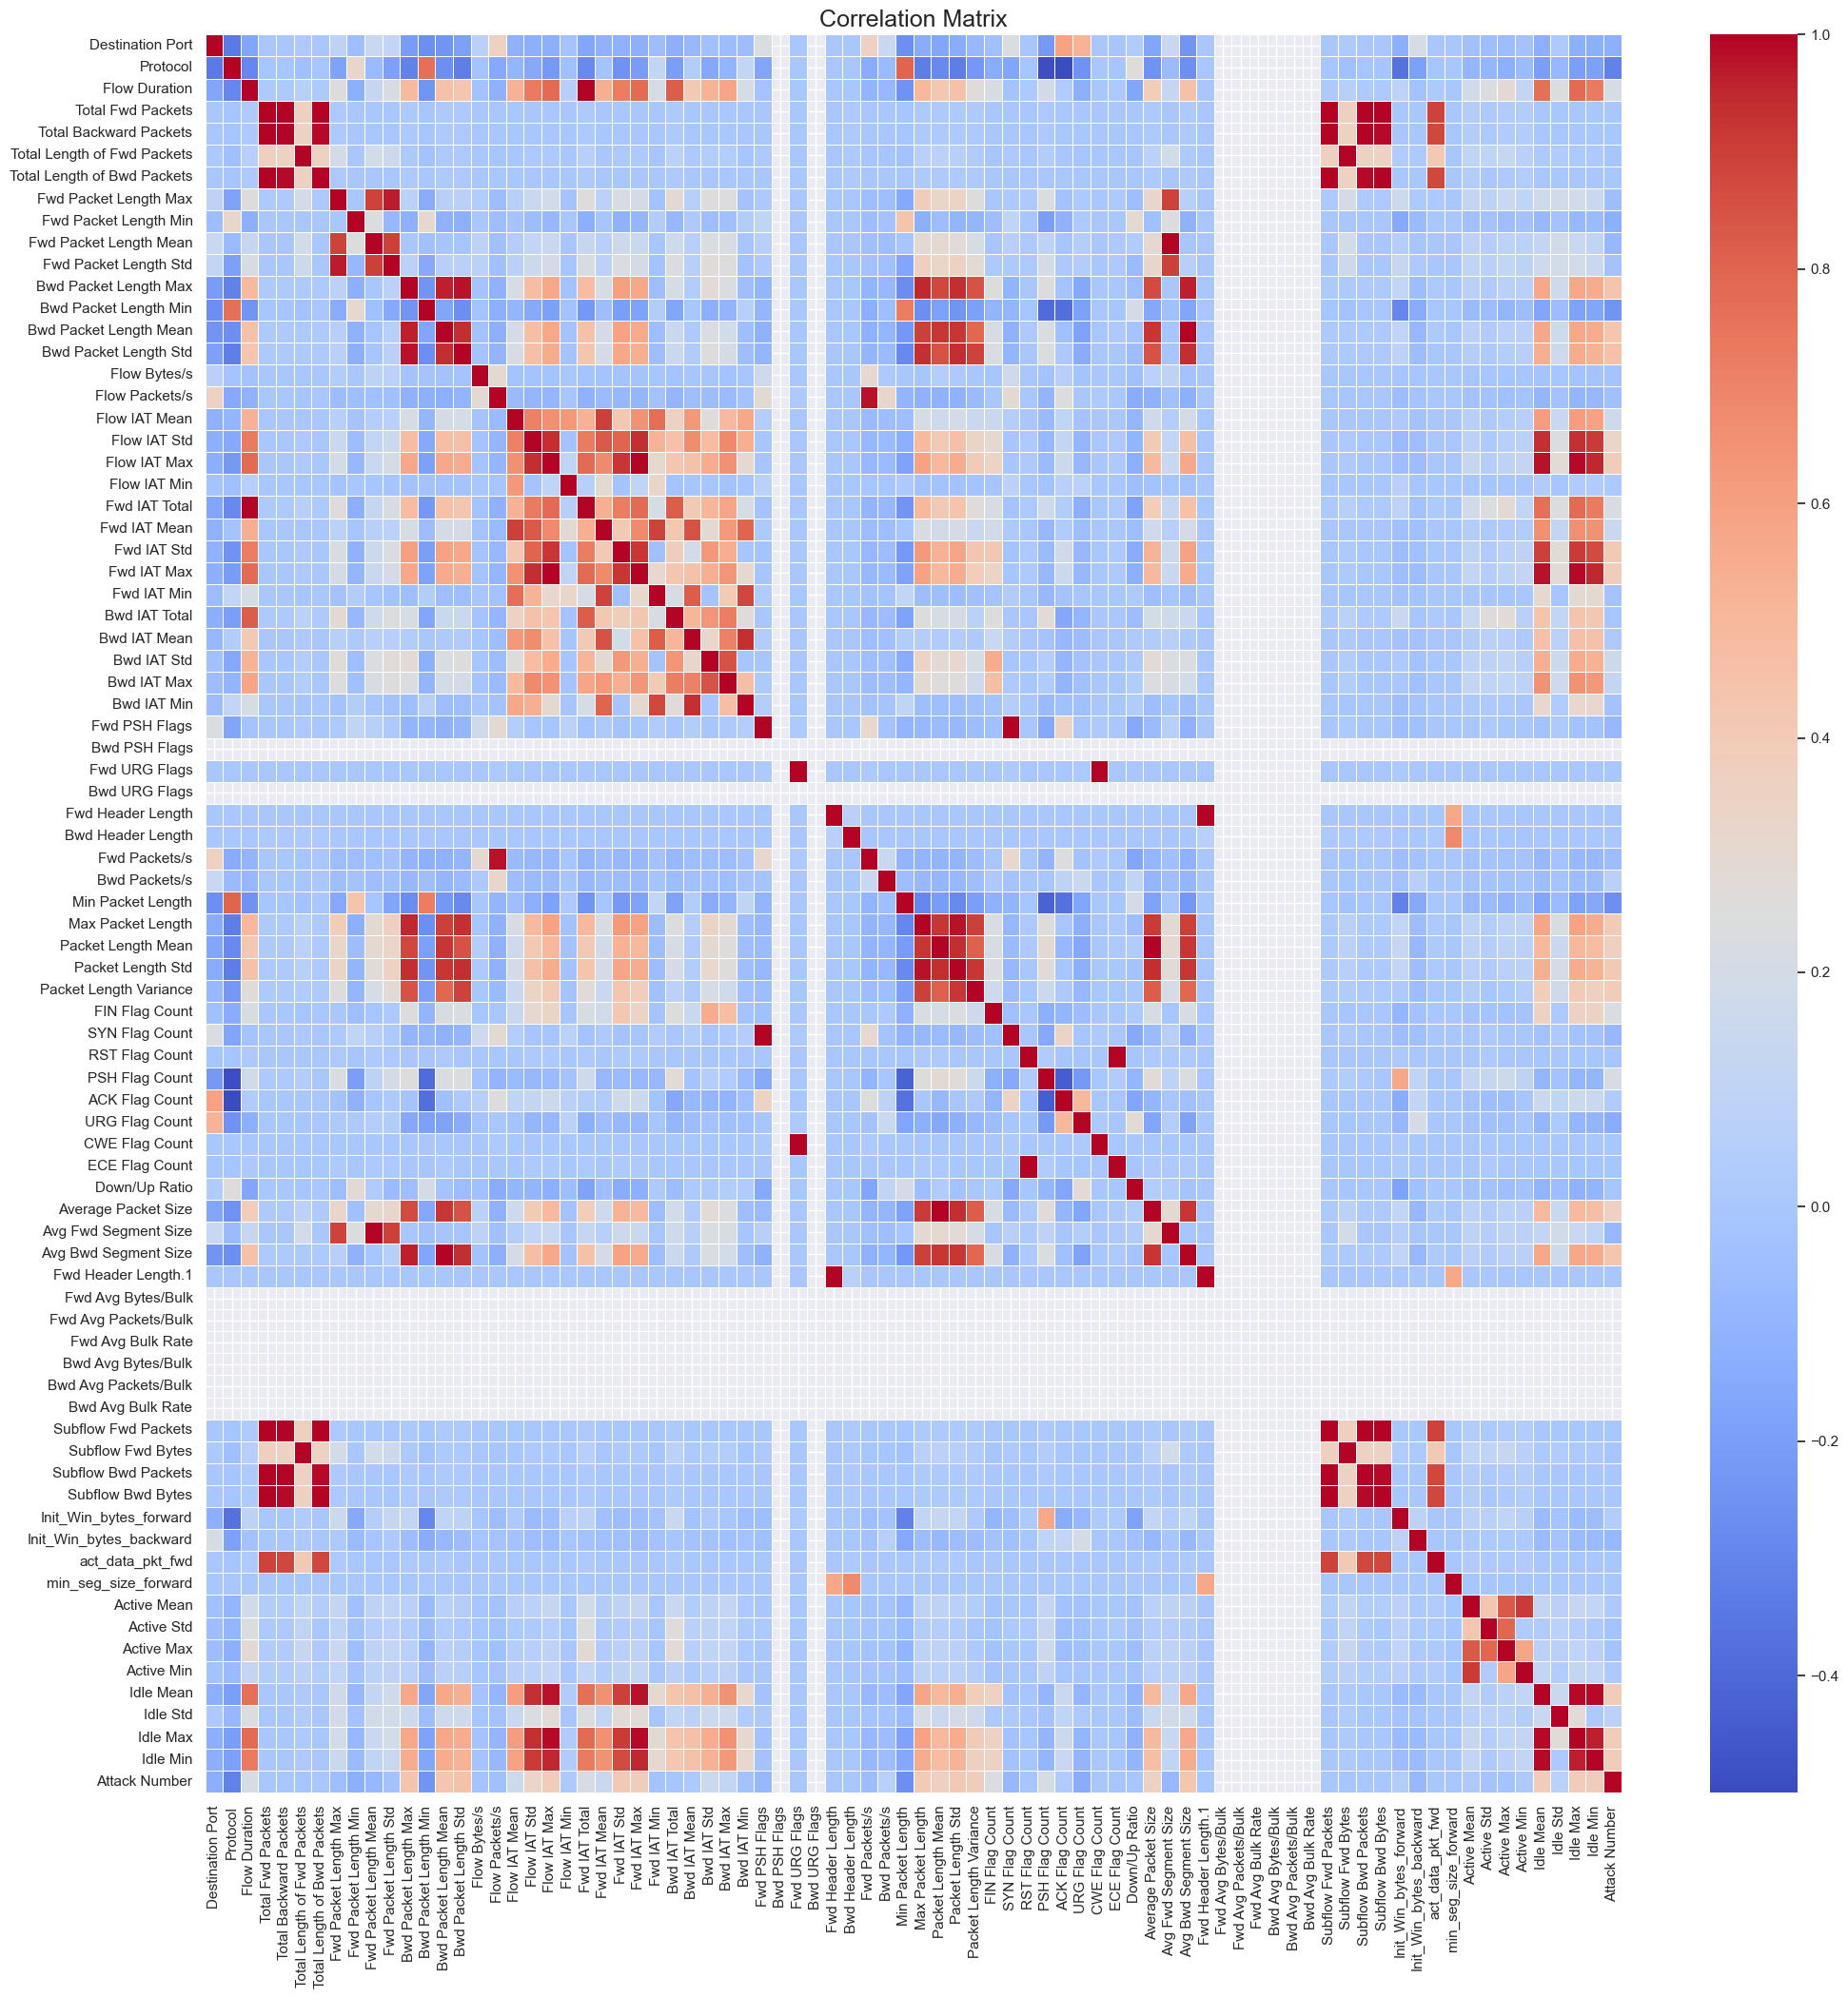

In [75]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [76]:
positive_corr_features=corr['Attack Number'][(corr['Attack Number']>0) & (corr['Attack Number']<1)].index.to_list()
print("Attack Number ile pozitif korelasyonlu özellikler:\n")
for i, feature in enumerate(positive_corr_features,start=1):
    corr_value=corr.loc[feature,'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Attack Number ile pozitif korelasyonlu özellikler:

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean              :0.01
28. 

In [78]:
constant_columns = [col for col in data.columns if data[col].nunique() == 1]

print(f"Sabit sütun sayısı: {len(constant_columns)}")
print("Sabit sütunlar:")
for col in constant_columns:
    print(col)

Sabit sütun sayısı: 8
Sabit sütunlar:
Bwd PSH Flags
Bwd URG Flags
Fwd Avg Bytes/Bulk
Fwd Avg Packets/Bulk
Fwd Avg Bulk Rate
Bwd Avg Bytes/Bulk
Bwd Avg Packets/Bulk
Bwd Avg Bulk Rate


In [79]:
# Sabit sütunları veri setinden çıkar
data = data.drop(columns=constant_columns)

print(f"Sabit sütunlar çıkarıldı. Kalan sütun sayısı: {data.shape[1]}")


Sabit sütunlar çıkarıldı. Kalan sütun sayısı: 73


***Visualization of Linear Relationships of columns***

In [80]:
sample_size = int(0.2 * len(data)) # 20% of the original size
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(504505, 73)

In [84]:
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{:<20s}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []

for col in numeric_cols:
    original_mean = data[col].mean()  
    sampled_mean = sampled_data[col].mean()  

    
    if original_mean != 0:
        variation = abs((sampled_mean - original_mean) / original_mean) * 100
    else:
        variation = 0

    if variation > 5:
        high_variations.append((col, variation))

    
    print('{:<32s}{:<22.2f}{:<22.2f}{:<20.2f}%'.format(col, original_mean, sampled_mean, variation))


if high_variations:
    print('\nFeatures with more than 5% variation:')
    for feature, var in high_variations:
        print(f'{feature}: {var:.2f}% variation')



Descriptive Statistics Comparison (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
Destination Port                8704.24               8709.41               0.06                %
Protocol                        9.96                  9.95                  0.11                %
Flow Duration                   16580252.53           16617356.56           0.22                %
Total Fwd Packets               10.28                 10.16                 1.17                %
Total Backward Packets          11.57                 11.42                 1.22                %
Total Length of Fwd Packets     611.60                603.80                1.28                %
Total Length of Bwd Packets     18131.98              17833.97              1.64                %
Fwd Packet Length Max           231.08                230.29                0

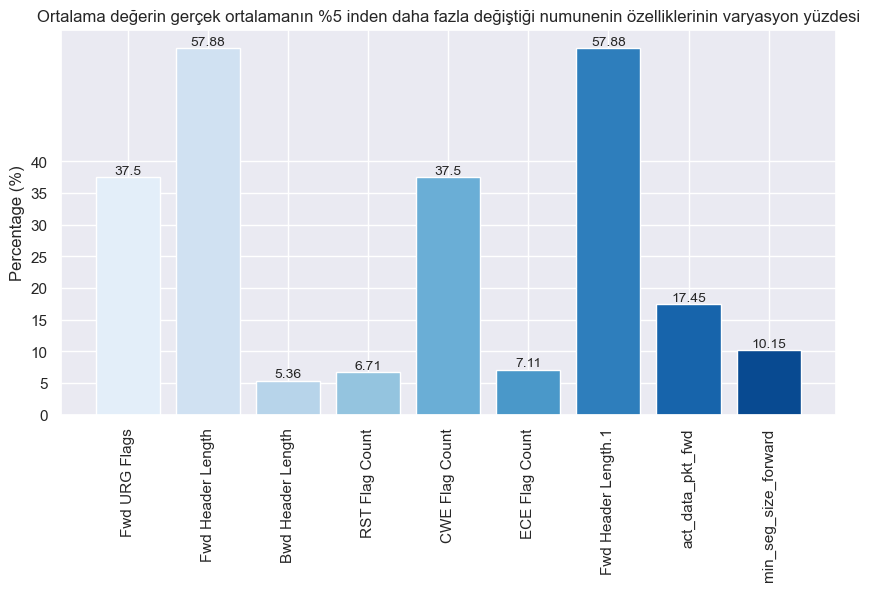

In [85]:

labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Ortalama değerin gerçek ortalamanın %5 inden daha fazla değiştiği numunenin özelliklerinin varyasyon yüzdesi')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()